# Setup

In [24]:
import os
if not 'notebookDir' in globals():
    notebookDir = os.getcwd()
print('notebookDir: ' + notebookDir)
os.chdir(notebookDir)

notebookDir: /home/user/Documents/Github/Uni/Master/TUM_Praktikum_NLP_Explainability/understanding-opinions-on-social-media/data exploration


# Data preparation

In [25]:
import pandas as pd
pd.options.display.max_columns = 100

In [26]:
dataset_path = '../data/USParties/Democrats.csv'
output = '../data/USParties/USParties_preprocessed.csv'

In [27]:
df = pd.read_csv(dataset_path, low_memory=False)
df_len = len(df)
df

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )
0,Senator Jack Reed,SenJackReed,213866375370646,GOVERNMENT_OFFICIAL,US,This is the official Facebook page of U.S. Sen...,2014-09-19 23:34:38 CEST,16439,30527,2021-05-05 17:32:19 CEST,2021-05-05,17:32:19,Photo,"3,757",1607,1231,195,491,2,161,7,50,13,NaN,-,0,0,0,NaN,https://www.facebook.com/213866375370646/posts...,"Welcome to Rhode Island, Madam Vice President!...",https://www.facebook.com/SenJackReed/photos/a....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.53
1,U.S. Senator Kirsten Gillibrand,SenKirstenGillibrand,147791132432624,GOVERNMENT_OFFICIAL,US,The official Facebook page for the Office of S...,2017-06-14 22:20:54 CEST,28112,157368,2021-04-29 03:02:33 CEST,2021-04-29,03:02:33,Photo,"9,446",3808,2749,512,1982,13,234,25,79,44,NaN,-,0,0,0,NaN,https://www.facebook.com/147791132432624/posts...,"For the first time in history, both seats behi...",https://www.facebook.com/SenKirstenGillibrand/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.82
2,Senator Maggie Hassan,SenatorHassan,523773000968844,GOVERNMENT_OFFICIAL,US,Proud to represent New Hampshire in the U.S. S...,2014-09-16 14:43:29 CEST,23081,37003,2021-04-23 18:13:17 CEST,2021-04-23,18:13:17,Photo,"5,755",1521,2907,138,587,9,190,18,373,12,NaN,-,0,0,0,NaN,https://www.facebook.com/523773000968844/posts...,Look who’s in New Hampshire today! I’m glad to...,https://www.facebook.com/SenatorHassan/photos/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.15
3,Senator Jeanne Shaheen,SenatorShaheen,127503767282103,GOVERNMENT_OFFICIAL,US,U.S. Senator Jeanne Shaheen is proud to repres...,2013-04-09 00:43:14 CEST,30335,47703,2021-04-20 23:56:22 CEST,2021-04-20,23:56:22,Link,"2,223",1170,542,60,342,1,6,14,13,75,NaN,-,0,0,0,NaN,https://www.facebook.com/127503767282103/posts...,"Justice has been served, but George Floyd shou...",https://www.cnn.com/2021/04/20/us/derek-chauvi...,NaN,NaN,Derek Chauvin found guilty of all three charge...,The former Minneapolis Police officer who knel...,NaN,NaN,NaN,17.10
4,Alex Padilla,alexpadilla4ca,471134912978464,POLITICIAN,US,U.S. Senator for California. Husband & Dad. Fo...,2014-11-04 18:39:17 CET,28053,29355,2021-04-20 15:39:06 CEST,2021-04-20,15:39:06,Native Video,812,534,77,49,137,0,5,0,1,9,owned,Yes,3746,7257,0,00:02:04,https://www.facebook.com/471134912978464/posts...,"Today, I am excited to announce my reelection ...",https://www.facebook.com/alexpadilla4ca/videos...,NaN,NaN,Alex Padilla for Senate,NaN,NaN,NaN,NaN,16.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,Senator Gary Peters,SenGaryPeters,88851604323,GOVERNMENT_OFFICIAL,US,U.S. Senator proudly representing the state of...,2013-04-09 00:40:45 CEST,42524,115082,2021-04-21 02:04:26 CEST,2021-04-21,02:04:26,Photo,"1,366",589,519,32,110,5,18,2,14,77,NaN,-,0,0,0,NaN,https://www.facebook.com/88851604323/posts/101...,Nothing can bring back George Floyd or take aw...,https://www.facebook.com/SenGaryPeters/photos/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
929,Senator Chuck Schumer,senschumer,15771239406,GOVERNMENT_OFFICIAL,US,"Official Account of Senator Chuck Schumer, New...",2013-04-09 00:40:56 CEST,429062,584691,2021-04-20 22:12:29 CEST,2021-04-20,22:12:29,Photo,"3,551",2441,303,255,445,7,48,2,24,26,NaN,-,0,0,0,NaN,https://www.facebook.com/15771239406/posts/101...,"For decades, young men and women—disproportion...",https://www.facebook.com/senschumer/ph

In [28]:
"before:", df_len, "after:", len(df.drop_duplicates(subset=['Message', 'Image Text']))

('before:', 933, 'after:', 926)

In [29]:
df = df.assign(
        reactions_sum=df.apply(lambda r: r['Likes'] + r['Comments'] + r['Shares'] + r['Love'] + r['Wow'] + r['Haha'] + r['Sad'] + r['Angry'] + r['Care'], axis=1).values
)
df = df.assign(
        reactions_groupavg=df.groupby('Facebook Id')['reactions_sum'].transform('mean').values
)
df = df.assign(
        score=df.apply(lambda r: (r['reactions_sum'] / r['reactions_groupavg']), axis=1).values
)
df_prep = df
df_prep


,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),reactions_sum,reactions_groupavg,score
0,Senator Jack Reed,SenJackReed,213866375370646,GOVERNMENT_OFFICIAL,US,This is the official Facebook page of U.S. Sen...,2014-09-19 23:34:38 CEST,16439,30527,2021-05-05 17:32:19 CEST,2021-05-05,17:32:19,Photo,"3,757",1607,1231,195,491,2,161,7,50,13,NaN,-,0,0,0,NaN,https://www.facebook.com/213866375370646/posts...,"Welcome to Rhode Island, Madam Vice President!...",https://www.facebook.com/SenJackReed/photos/a....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.53,3757,2015.500000,1.864054
1,U.S. Senator Kirsten Gillibrand,SenKirstenGillibrand,147791132432624,GOVERNMENT_OFFICIAL,US,The official Facebook page for the Office of S...,2017-06-14 22:20:54 CEST,28112,157368,2021-04-29 03:02:33 CEST,2021-04-29,03:02:33,Photo,"9,446",3808,2749,512,1982,13,234,25,79,44,NaN,-,0,0,0,NaN,https://www.facebook.com/147791132432624/posts...,"For the first time in history, both seats behi...",https://www.facebook.com/SenKirstenGillibrand/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.82,9446,959.370370,9.846041
2,Senator Maggie Hassan,SenatorHassan,523773000968844,GOVERNMENT_OFFICIAL,US,Proud to represent New Hampshire in the U.S. S...,2014-09-16 14:43:29 CEST,23081,37003,2021-04-23 18:13:17 CEST,2021-04-23,18:13:17,Photo,"5,755",1521,2907,138,587,9,190,18,373,12,NaN,-,0,0,0,NaN,https://www.facebook.com/523773000968844/posts...,Look who’s in New Hampshire today! I’m glad to...,https://www.facebook.com/SenatorHassan/photos/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.15,5755,757.275862,7.599608
3,Senator Jeanne Shaheen,SenatorShaheen,127503767282103,GOVERNMENT_OFFICIAL,US,U.S. Senator Jeanne Shaheen is proud to repres...,2013-04-09 00:43:14 CEST,30335,47703,2021-04-20 23:56:22 CEST,2021-04-20,23:56:22,Link,"2,223",1170,542,60,342,1,6,14,13,75,NaN,-,0,0,0,NaN,https://www.facebook.com/127503767282103/posts...,"Justice has been served, but George Floyd shou...",https://www.cnn.com/2021/04/20/us/derek-chauvi...,NaN,NaN,Derek Chauvin found guilty of all three charge...,The former Minneapolis Police officer who knel...,NaN,NaN,NaN,17.10,2223,372.777778,5.963338
4,Alex Padilla,alexpadilla4ca,471134912978464,POLITICIAN,US,U.S. Senator for California. Husband & Dad. Fo...,2014-11-04 18:39:17 CET,28053,29355,2021-04-20 15:39:06 CEST,2021-04-20,15:39:06,Native Video,812,534,77,49,137,0,5,0,1,9,owned,Yes,3746,7257,0,00:02:04,https://www.facebook.com/471134912978464/posts...,"Today, I am excited to announce my reelection ...",https://www.facebook.com/alexpadilla4ca/videos...,NaN,NaN,Alex Padilla for Senate,NaN,NaN,NaN,NaN,16.24,812,506.565217,1.602953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,Senator Gary Peters,SenGaryPeters,88851604323,GOVERNMENT_OFFICIAL,US,U.S. Senator proudly representing the state of...,2013-04-09 00:40:45 CEST,42524,115082,2021-04-21 02:04:26 CEST,2021-04-21,02:04:26,Photo,"1,366",589,519,32,110,5,18,2,14,77,NaN,-,0,0,0,NaN,https://www.facebook.com/88851604323/posts/101...,Nothing can bring back George Floyd or take aw...,https://www.facebook.com/SenGaryPeters/photos/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1366,1666.842105,0.819514
929,Senator Chuck Schumer,senschumer,15771239406,GOVERNMENT_OFFICIAL,US,"Official Account of Senator Chuck Schumer, New...",2013-04-09 00:40:56 CEST,429062,584691,2021-04-20 22:12:29 CEST,2021-04-20,22:12:2

In [30]:
df_prep.columns

Index(['Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created',
       'Post Created Date', 'Post Created Time', 'Type', 'Total Interactions',
       'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care', 'Video Share Status', 'Is Video Owner?', 'Post Views',
       'Total Views', 'Total Views For All Crossposts', 'Video Length', 'URL',
       'Message', 'Link', 'Final Link', 'Image Text', 'Link Text',
       'Description', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'reactions_sum', 'reactions_groupavg', 'score'],
      dtype='object')

In [31]:
unwanted_cols = ["Page Category", "Page Admin Top Country", "Page Description", "Page Created", "Post Created Date", "Post Created Time", "Is Video Owner?", "Sponsor Category"]

df_filt = df_prep.drop(unwanted_cols, axis=1)
# rename
df_filt = df_filt.rename(columns={"Post Created": "Created"})
df_filt


,Page Name,User Name,Facebook Id,Likes at Posting,Followers at Posting,Created,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),reactions_sum,reactions_groupavg,score
0,Senator Jack Reed,SenJackReed,213866375370646,16439,30527,2021-05-05 17:32:19 CEST,Photo,"3,757",1607,1231,195,491,2,161,7,50,13,NaN,0,0,0,NaN,https://www.facebook.com/213866375370646/posts...,"Welcome to Rhode Island, Madam Vice President!...",https://www.facebook.com/SenJackReed/photos/a....,NaN,NaN,NaN,NaN,NaN,NaN,20.53,3757,2015.500000,1.864054
1,U.S. Senator Kirsten Gillibrand,SenKirstenGillibrand,147791132432624,28112,157368,2021-04-29 03:02:33 CEST,Photo,"9,446",3808,2749,512,1982,13,234,25,79,44,NaN,0,0,0,NaN,https://www.facebook.com/147791132432624/posts...,"For the first time in history, both seats behi...",https://www.facebook.com/SenKirstenGillibrand/...,NaN,NaN,NaN,NaN,NaN,NaN,18.82,9446,959.370370,9.846041
2,Senator Maggie Hassan,SenatorHassan,523773000968844,23081,37003,2021-04-23 18:13:17 CEST,Photo,"5,755",1521,2907,138,587,9,190,18,373,12,NaN,0,0,0,NaN,https://www.facebook.com/523773000968844/posts...,Look who’s in New Hampshire today! I’m glad to...,https://www.facebook.com/SenatorHassan/photos/...,NaN,NaN,NaN,NaN,NaN,NaN,18.15,5755,757.275862,7.599608
3,Senator Jeanne Shaheen,SenatorShaheen,127503767282103,30335,47703,2021-04-20 23:56:22 CEST,Link,"2,223",1170,542,60,342,1,6,14,13,75,NaN,0,0,0,NaN,https://www.facebook.com/127503767282103/posts...,"Justice has been served, but George Floyd shou...",https://www.cnn.com/2021/04/20/us/derek-chauvi...,NaN,NaN,Derek Chauvin found guilty of all three charge...,The former Minneapolis Police officer who knel...,NaN,NaN,17.10,2223,372.777778,5.963338
4,Alex Padilla,alexpadilla4ca,471134912978464,28053,29355,2021-04-20 15:39:06 CEST,Native Video,812,534,77,49,137,0,5,0,1,9,owned,3746,7257,0,00:02:04,https://www.facebook.com/471134912978464/posts...,"Today, I am excited to announce my reelection ...",https://www.facebook.com/alexpadilla4ca/videos...,NaN,NaN,Alex Padilla for Senate,NaN,NaN,NaN,16.24,812,506.565217,1.602953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,Senator Gary Peters,SenGaryPeters,88851604323,42524,115082,2021-04-21 02:04:26 CEST,Photo,"1,366",589,519,32,110,5,18,2,14,77,NaN,0,0,0,NaN,https://www.facebook.com/88851604323/posts/101...,Nothing can bring back George Floyd or take aw...,https://www.facebook.com/SenGaryPeters/photos/...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1366,1666.842105,0.819514
929,Senator Chuck Schumer,senschumer,15771239406,429062,584691,2021-04-20 22:12:29 CEST,Photo,"3,551",2441,303,255,445,7,48,2,24,26,NaN,0,0,0,NaN,https://www.facebook.com/15771239406/posts/101...,"For decades, young men and women—disproportion...",https://www.facebook.com/senschumer/photos/a.1...,NaN,NORML NORML @NORML Schumer says it's time to e...,NaN,NaN,NaN,NaN,1.00,3551,5172.552239,0.686508
930,Alexandria Ocasio-Cortez,OcasioCortez,1316372698453411,1775646,1870212,2021-04-17 15:59:38 CEST,Link,"32,987",22242,3702,1321,4636,63,251,31,318,423,NaN,0,0,0,NaN,https://www.facebook.com/1316372698453411/post...,This is a testament to the power that people’s...,https://apnews.com/article/joe-biden-donald-tr...,NaN,NaN,"After outcry, WH says Biden will lift refugee ...",WASHINGTON (AP) — Facing swift blowback from a...,NaN,NaN,1.00,32987,50609.250000,0.651798
931,U.S. Senator Kirsten Gillibrand,SenKirstenGillibrand,147791132432624,28084,157368,2021-04-20 18:13:20 CEST,Native Video,251,146,28,44,8,0,1,1,3,20,owned,3054,3632,0,00:01:42,https://www.facebook.com/147791132432624/posts...,It is a moral outrag

In [32]:
df_filt.to_csv(output)

# Training

In [1]:
import pytorch_lightning as pl
from nlp_utils.data_module import CrowdTangleDataModule
from nlp_utils.model import BaseModel
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
%load_ext tensorboard

In [2]:
# Start tensorboard
! pkill tensorboard
! rm -r /tmp/.tensorboard-info
%tensorboard --logdir lightning_logs --bind_all

Launching TensorBoard...

In [3]:
# config from notebooks
config = {
    'batch_size': 128,
    'dataset_path': '../../data/USParties/USParties_preprocessed.csv',
    'category_group_id': False, # impacts size of data_module.class_encoder.categories_
    'learning_rate': 1e-4
}

In [4]:
# config used by Simon
config = {
    'batch_size': 32,
    'dataset_path': '../../data/USParties/USParties_preprocessed.csv',
    'learning_rate': 0.01
}

## read dataset + labels

In [5]:
data_module = CrowdTangleDataModule(config=config)
data_module.setup('')
# tokenizer for decoding sentences
tokenizer = data_module.get_tokenizer() 

In [6]:
category_vector_length = len(data_module.class_encoder.get_feature_names())
config['category_encoded_length'] = category_vector_length
config['category_encoder_out'] = category_vector_length

In [7]:
model = BaseModel(config)
trainer = pl.Trainer(gpus=0,
                     log_every_n_steps=1,
                     flush_logs_every_n_steps=1,
                    callbacks=[EarlyStopping(monitor='val_loss')], max_epochs=2) #, max_epochs=10, overfit_batches=10)
trainer.fit(model, data_module)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name             | Type             | Params
------------------------------------------------------
0 | train_metric     | MeanSquaredError | 0     
1 | val_metric       | MeanSquaredError | 0     
2 | test_metric      | MeanSquaredError | 0     
3 | bert             | DistilBertModel  | 66.4 M
4 | distilbert_tail  | Sequential       | 590 K 
5 | category_encoder | Sequential       | 28.7 K
6 | classifier       | Linear           | 938   
------------------------------------------------------
620 K     Trainable params
66.4 M    Non-trainable params
67.0 M    Total params
267.933   Total estimated model params size (MB)
Epoch 0:   0%|          | 0/24 [00:00<?, ?it/s] {'input_ids': tensor([[  101,  1996,  2157,  ...,     0,     0,     0],
        [  101,  2057,  2342,  ...,     0,     0,     0],
        [  101,  2111,  1999,  ...,     0,     0,     0],
        ...,
        [  101,  7256, 15775,  ...,     0, 

In [8]:
y_lst, encoded_texts_lst, category_vectors_lst, features = next(iter(data_module.train_dataloader()))

In [9]:
# only works if category group id = True
len(data_module.class_encoder.categories_[2])

116

# Evaluation

In [6]:
import pandas as pd
from nlp_utils.data_module import PlainCrowdTangleDataModule, CrowdTangleDataModule, GroupId2Name, inverse_transform
from nlp_utils.model import BaseModel, BiLSTMModel
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from glob import glob
import ipywidgets as widgets
from tqdm.notebook import tqdm
import pandas as pd
import torch
import seaborn as sb
import re
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [7]:
# Start tensorboard
! pkill tensorboard
! rm -r /tmp/.tensorboard-info
%tensorboard --logdir lightning_logs --bind_all

Launching TensorBoard...

Select a model

In [8]:
w = widgets.Dropdown(
    options=glob('lightning_logs/*/checkpoints/*.ckpt'),
    description='Select a checkpoint:'
)
w

Dropdown(description='Select a checkpoint:', options=('lightning_logs/version_0/checkpoints/epoch=0-step=17.ck…

In [9]:
model_version = re.findall("version_[0-9]+", w.value)[0]
model = BaseModel.load_from_checkpoint(w.value)
#model = BiLSTMModel.load_from_checkpoint(w.value)

torch.no_grad()
model.eval()
data_module = CrowdTangleDataModule(config=model.config)
# data_module = PlainCrowdTangleDataModule(config=model.config) # for BiLSTM
data_module.setup('')
model.config, model_version

({'column_goldlabel': 'score',
  'dataset_path': '../../data/USParties/USParties_preprocessed.csv',
  'category_group_id': True,
  'category_type': True,
  'category_tld': True,
  'batch_size': 32,
  'category_encoded_length': 169,
  'category_encoder_out': 169,
  'learning_rate': 0.01,
  'vocab_min_freq': 10,
  'bilstm_hidden_dim': 150,
  'embedding_dim': 100},
 'version_0')

### Validation Set Results

In [10]:
df_dicts = []
val_loader = data_module.val_dataloader()
#groupid2name = GroupId2Name(model.config)
for y_lst, encoded_texts_lst, category_vectors_lst, features in tqdm(iter(val_loader),total=len(val_loader)):
    
    result = model(encoded_texts_lst, category_vectors_lst)
    for y_hat, y, encoded_text, category_vector in zip(result, y_lst, encoded_texts_lst['input_ids'], category_vectors_lst):
        decoded_categories = inverse_transform(category_vector.reshape(1, -1), model.config, data_module.class_encoder)

        df_dicts.append({**{
            'prediction': float(y_hat),
            'gold label': float(y),
            'text': data_module.tokenizer.decode(encoded_text).replace(' [PAD]','')
        },**decoded_categories})
#encoded_texts
#data_module.tokenizer.decode(encoded_texts["input_ids"][0]).replace(' [PAD]','')
pd.DataFrame.from_dict(df_dicts)

  0%|          | 0/6 [00:00<?, ?it/s]

,prediction,gold label,text,group_id,post_type,domain
0,0.910735,0.677367,[CLS] there's no debating ohio's infrastructur...,2.614783e+14,Link,None
1,1.011816,0.527254,[CLS] i'm constantly inspired by enes kanter's...,6.846731e+09,Photo,facebook
2,1.031215,0.698824,[CLS] a sad day for all those touched by the c...,4.711349e+14,Link,go
3,1.071002,0.588431,[CLS] great to be with first lady dr. jill bid...,7.667947e+14,Photo,facebook
4,1.260363,1.739470,[CLS] we have lost too many montanans already ...,2.105730e+11,Status,
...,...,...,...,...,...,...
182,0.832897,1.619407,"[CLS] yesterday, president joe biden made hist...",1.093040e+11,Link,cnbc
183,0.873242,0.613468,"[CLS] until recently if i was walking outside,...",6.565240e+14,Native Video,facebook
184,0.917911,0.474683,[CLS] voters like a plan that invests in their...,7.437493e+10,Link,thehill
185,0.921035,0.951422,[CLS] whether i ’ m walking the halls of congr...,1.283446e+15,Photo,facebook


Text(0.5, 1.0, 'version_0')

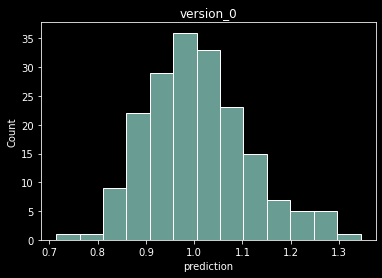

In [11]:
df = pd.DataFrame.from_dict(df_dicts)
sb.histplot(data=df['prediction']).set_title(model_version)

### Manual Test

In [16]:
dataset_path = '../data/USParties/USParties_preprocessed.csv'

In [17]:
df = pd.read_csv(dataset_path)
w_post_type = widgets.Dropdown(
    options=df['Type'].unique().tolist(),
    description='Post Type:'
)
w_group_id = widgets.Dropdown(
    options=list(df.drop_duplicates(subset=['Group Name', 'Facebook Id'])[['Group Name', 'Facebook Id']].itertuples(index=False, name=None)),
    description='Group:'
)
w_text = widgets.Textarea(
    value='',
    placeholder='post text'
)
display(w_post_type, w_group_id, w_text)

KeyError: Index(['Group Name'], dtype='object')

In [ ]:
class_encoding = torch.FloatTensor(data_module.class_encoder.transform([(w_group_id.value, w_post_type.value)]))
text_encoding = data_module.tokenizer([w_text.value], padding=True, truncation=True, return_tensors="pt")
result = model(text_encoding, class_encoding)
float(result)

### MSE per group

In [ ]:
# initialize MSE for each facebook group
groupid2name = GroupId2Name(model.config)
df_dicts = []
groups_mse = {}
totalmse = pl.metrics.MeanSquaredError()
for group_id, _ in groupid2name.group_id2name.items():
    groups_mse[group_id] = pl.metrics.MeanSquaredError()
    
for y_lst, encoded_texts_lst, category_vectors_lst, _ in tqdm(iter(data_module.test_dataloader()), total=len(data_module.test_dataloader())):
    y_hat_lst = model(encoded_texts_lst, category_vectors_lst)
    totalmse(y_hat_lst.squeeze(), y_lst)
    
    for y_hat, y, encoded_text, category_vector in zip(y_hat_lst, y_lst, encoded_texts_lst, category_vectors_lst):
        decoded_categories = inverse_transform(category_vector.reshape(1, -1), model.config, data_module.class_encoder)
        group_id = decoded_categories['group_id']
        
        groups_mse[group_id](y_hat.squeeze(), y)
    
        df_dicts.append({**{
            'prediction': float(y_hat),
            'gold label': float(y),
            'text': ' '.join([data_module.vocab.itos[int(t)] for t in encoded_text])
        },**decoded_categories})
for group_id, _ in groups_mse.items():
    print(groupid2name(group_id) + ':', float(groups_mse[group_id].compute()))


In [ ]:
totalmse.compute()

In [ ]:
pd.DataFrame.from_dict(df_dicts)

### MSE without groups

In [ ]:
df_dicts = []
mse = pl.metrics.MeanSquaredError()
for y_lst, encoded_texts_lst, category_vectors_lst, _ in tqdm(iter(data_module.test_dataloader()), total=len(data_module.test_dataloader())):
    y_hat_lst = model(encoded_texts_lst, category_vectors_lst)
    mse(y_hat_lst.squeeze(), y_lst)
    
    for y_hat, y, encoded_text, category_vector in zip(y_hat_lst, y_lst, encoded_texts_lst, category_vectors_lst):
        decoded_categories = inverse_transform(category_vector.reshape(1, -1), model.config, data_module.class_encoder)
           
        df_dicts.append({**{
            'prediction': float(y_hat),
            'gold label': float(y),
            'text': ' '.join([data_module.vocab.itos[int(t)] for t in encoded_text])
        },**decoded_categories})


In [ ]:
mse.compute()

# Analysis

In [4]:
import pandas as pd
import seaborn as sb
from pathlib import Path
sb.set_context(rc = {'patch.linewidth': 0.0})

In [5]:
dataset_path = Path('../data/USParties/USParties_preprocessed.csv')

In [6]:
df = pd.read_csv(dataset_path,low_memory=False)
dataset_name = dataset_path.stem
figure_path = Path('./figures/' + dataset_name + '/')
figure_path.mkdir(parents=True, exist_ok=True)
dataset_name, str(figure_path)

('USParties_preprocessed', 'figures/USParties_preprocessed')

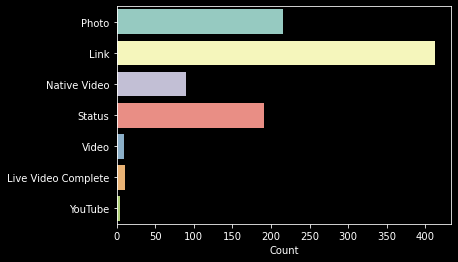

In [7]:
#df['Type'].value_counts().plot(kind='bar')
plt = sb.countplot(y="Type", data=df)
plt.set(ylabel="", xlabel="Count")
plt.figure.savefig(f'{figure_path}/post_types_dist.pdf', bbox_inches = 'tight', pad_inches = 0)

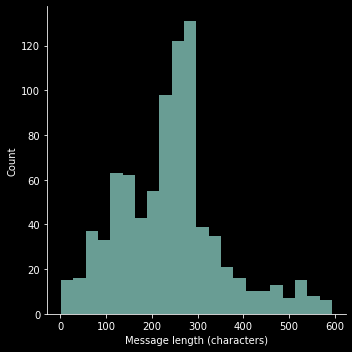

In [8]:
plt = sb.displot(df[df['Message'].str.len() < 600]['Message'].str.len())
plt.set(xlabel="Message length (characters)")
plt.savefig(f'{figure_path}/message_length_dist.pdf', bbox_inches = 'tight', pad_inches = 0)

In [9]:
plt = sb.countplot(y="Group Name", data=df)
plt.set(xlabel="Count", ylabel="")
plt.figure.savefig(f'{figure_path}/group_dist.pdf', bbox_inches = 'tight', pad_inches = 0)

ValueError: Could not interpret input 'Group Name'

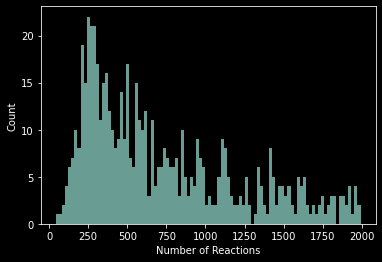

In [10]:
df_score_filtered = df[(df.reactions_sum < 2000)]
plt = sb.histplot(data=df_score_filtered['reactions_sum'], bins=100)
plt.set(xlabel="Number of Reactions")
plt.figure.savefig(f'{figure_path}/reactions_dist.pdf', bbox_inches = 'tight', pad_inches = 0)

In [11]:
df.reactions_sum.median()

1098.0